In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mbeml.constants import TargetProperty, unique_cores, roman_numerals

In [2]:
plt.style.use("mbeml.mbeml")

In [3]:
data_dir = Path("../../data/")

names = [
    "training_data.csv",
    "validation_data.csv",
    "composition_test_data.csv",
    "ligand_test_data.csv",
]
data_sets = [pd.read_csv(data_dir / name) for name in names]

In [4]:
dataset_color_dict = {
    "Training set": "C0",
    "Validation set": "C1",
    "Composition test set": "C2",
    "Ligand test set": "C3",
}

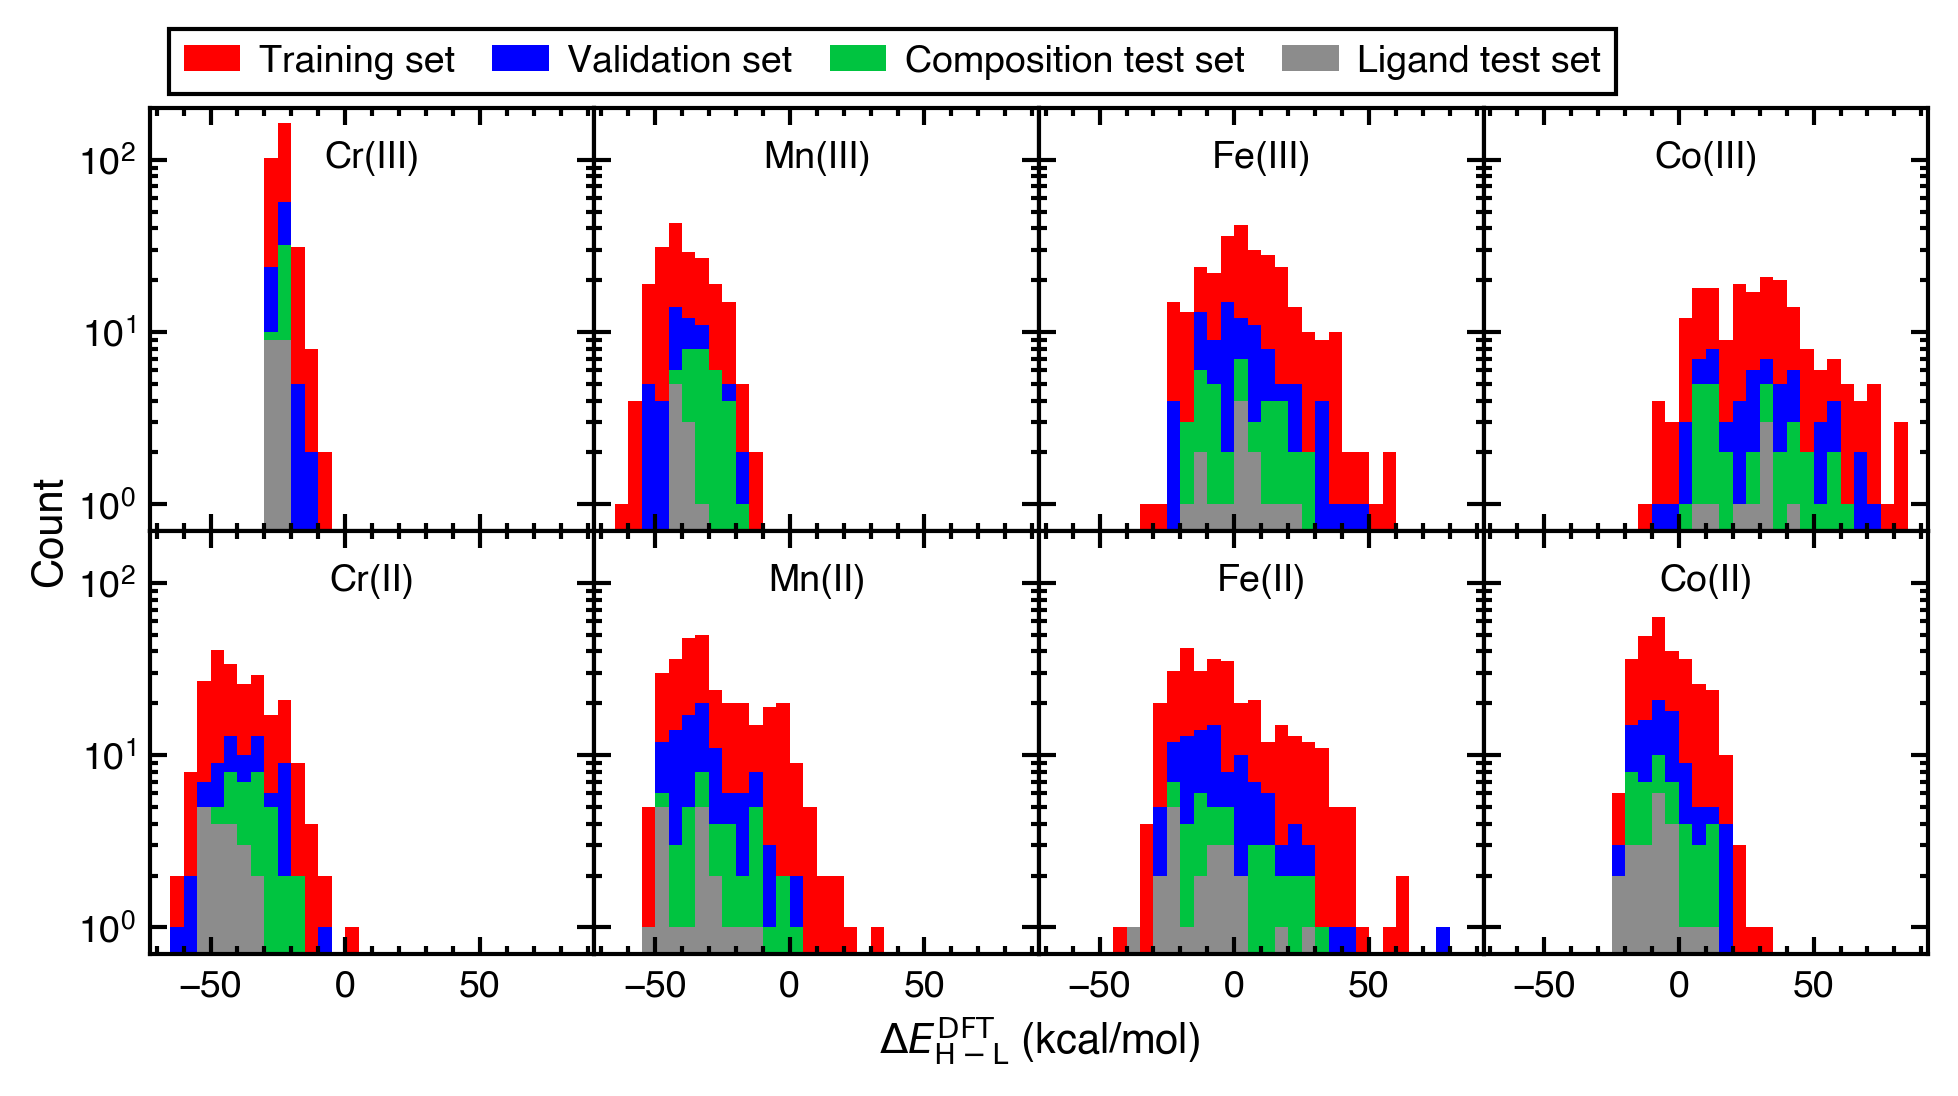

In [5]:
gridspec_kw = {
    "left": 0.08,
    "right": 0.97,
    "top": 0.90,
    "bottom": 0.13,
    "hspace": 0.0,
    "wspace": 0.0,
}
fig, axes = plt.subplots(
    figsize=(6.66, 1.1 * 3.33),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey=True,
    gridspec_kw=gridspec_kw,
)

bins = np.linspace(-65, 85, 31)

for core, ax in zip(unique_cores, axes.T.flatten()):
    bottoms = np.zeros(len(bins) - 1)
    for i, df in enumerate(data_sets[::-1]):
        cores = df[["metal", "ox"]].apply(lambda x: f"{x.metal}{x.ox}", axis=1).values
        mask = cores == core
        y = df[mask][TargetProperty.SSE.full_name()]
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms, color=f"C{3-i}")
        bottoms += counts
    ax.text(
        10,
        130,
        f"{core[:2].capitalize()}({roman_numerals[core[-1]]})",
        ha="center",
        va="top",
        fontsize=9,
    )
    ax.set_yscale("log")
    ax.set_ylim(0.7, 200)
    ax.set_yticks(
        list(range(2, 10)) + [10 * i for i in range(2, 10)],
        minor=True,
    )
    ax.set_xticks(10 * np.arange(-7, 10), minor=True)

# Labels
fig.text(
    gridspec_kw["left"] + 0.5 * (gridspec_kw["right"] - gridspec_kw["left"]),
    gridspec_kw["bottom"] - 0.09,
    "$\Delta E^\mathrm{DFT}_{\mathrm{H}-\mathrm{L}}$ (kcal/mol)",
    ha="center",
)
fig.text(
    0.02,
    gridspec_kw["bottom"] + 0.5 * (gridspec_kw["top"] - gridspec_kw["bottom"]),
    "Count",
    rotation=90,
    va="center",
)

# Legend
ax = axes[0, 0]
for label, color in dataset_color_dict.items():
    ax.hist([], label=label, color=color)
ax.legend(loc="upper left", bbox_to_anchor=(0.0, 1.23), ncols=4)
fig.savefig("plots/histogram_sse.pdf")

# Orbitals

In [6]:
from matplotlib.legend_handler import HandlerTuple

alpha_dict = {"LS": 0.6, "HS": 1.0}


def dataset_legend(ax, legend_kwargs=None):
    if legend_kwargs is None:
        legend_kwargs = dict(loc="upper left")

    handles = []
    labels = []
    for metal, color in dataset_color_dict.items():
        handles.append(
            (
                ax.hist([], color=color, alpha=alpha_dict["LS"])[2],
                ax.hist([], color=color, alpha=alpha_dict["HS"])[2],
            )
        )
        labels.append(metal.capitalize())
    for ox, alpha in [("LS", alpha_dict["LS"]), ("HS", alpha_dict["HS"])]:
        handles.append(
            tuple(
                (
                    ax.hist([], color=color, alpha=alpha)[2]
                    for color in dataset_color_dict.values()
                )
            )
        )
        labels.append(ox)

    legend = ax.legend(
        handles,
        labels,
        ncols=6,
        handler_map={tuple: HandlerTuple(ndivide=None, pad=0.0)},
        **legend_kwargs,
    )
    return legend

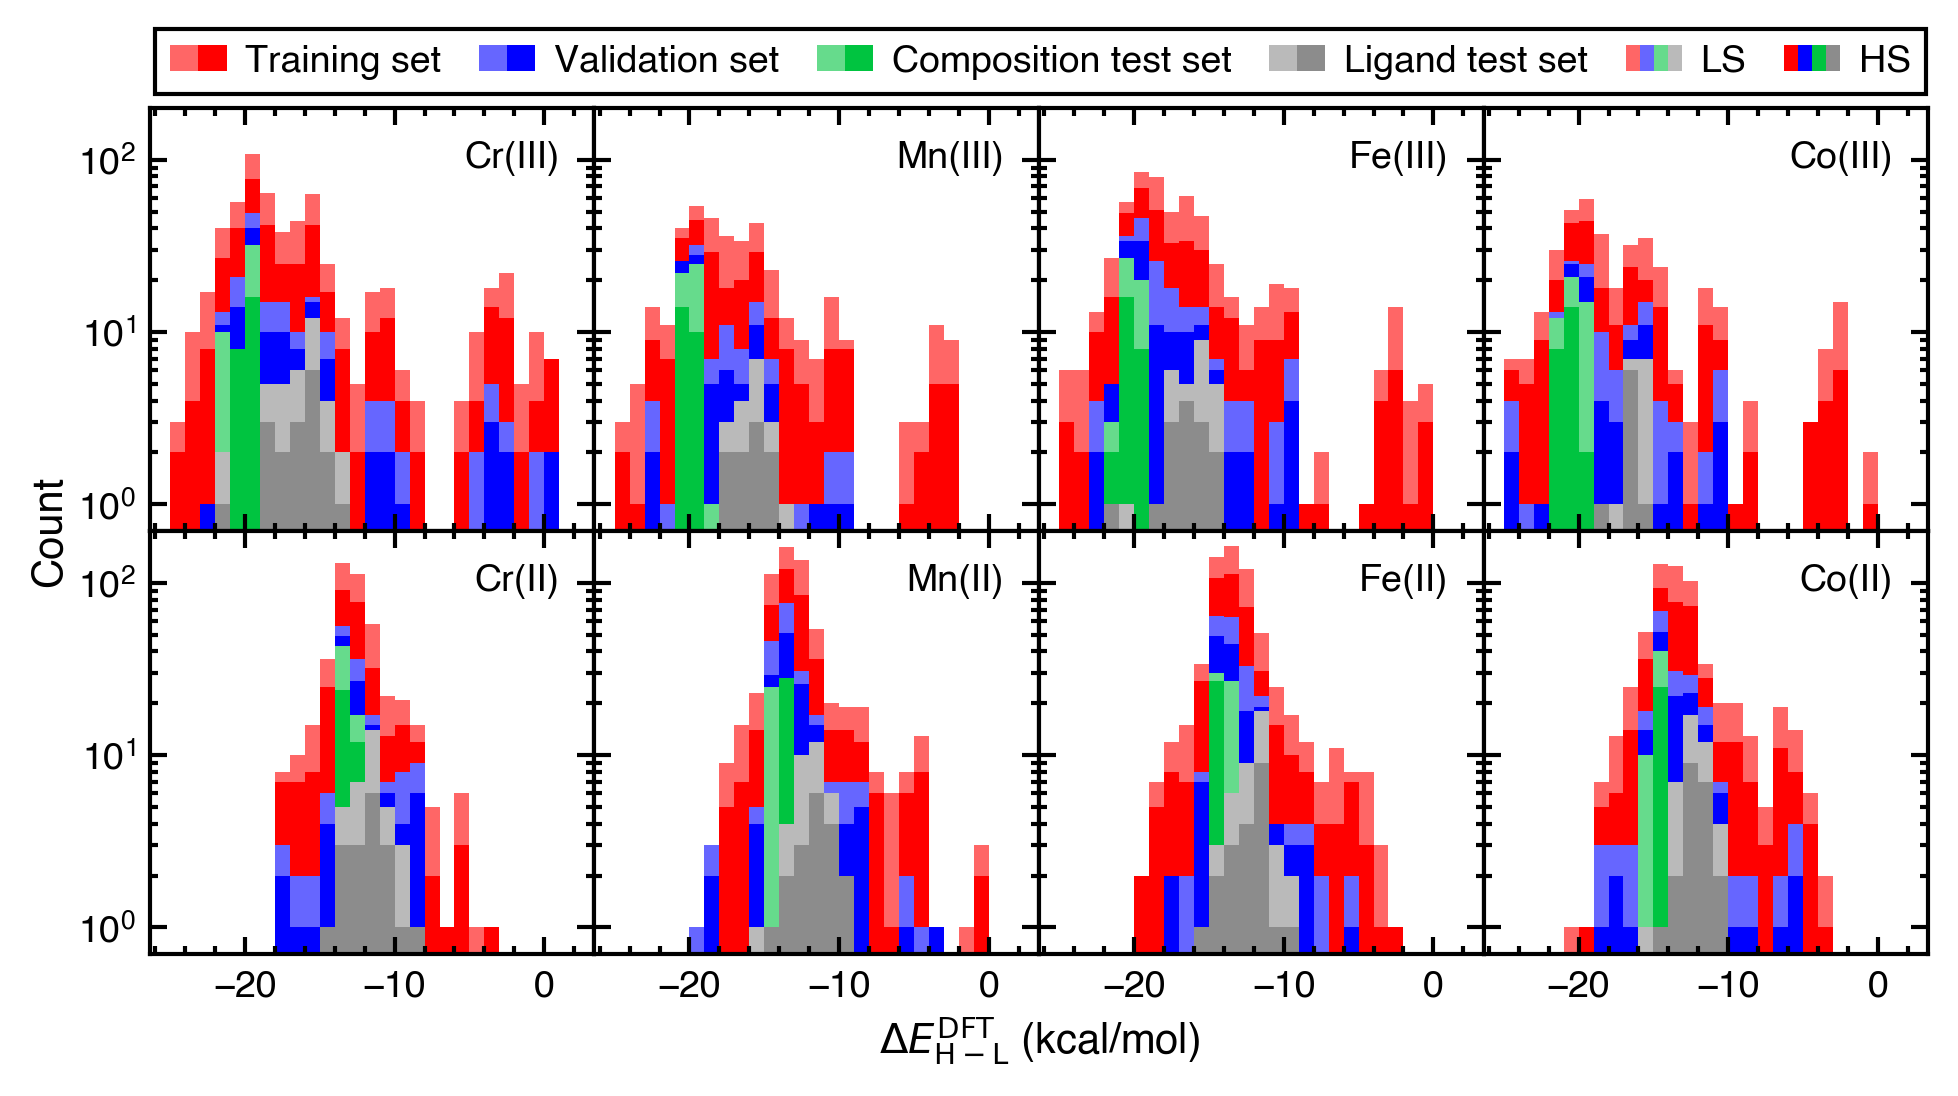

In [7]:
gridspec_kw = {
    "left": 0.08,
    "right": 0.97,
    "top": 0.90,
    "bottom": 0.13,
    "hspace": 0.0,
    "wspace": 0.0,
}
fig, axes = plt.subplots(
    figsize=(6.66, 1.1 * 3.33),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey=True,
    gridspec_kw=gridspec_kw,
)

bins = np.linspace(-25, 2, 28)

for core, ax in zip(unique_cores, axes.T.flatten()):
    bottoms = np.zeros(len(bins) - 1)
    for i, df in enumerate(data_sets[::-1]):
        cores = df[["metal", "ox"]].apply(lambda x: f"{x.metal}{x.ox}", axis=1).values
        mask = cores == core
        y = df[mask][TargetProperty.ORBITALS.full_name()].values[:, 0].flatten()
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms, color=f"C{3-i}")
        bottoms += counts
        y = df[mask][TargetProperty.ORBITALS.full_name()].values[:, 1].flatten()
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms, color=f"C{3-i}", alpha=0.6)
        bottoms += counts
    ax.text(
        1,
        130,
        f"{core[:2].capitalize()}({roman_numerals[core[-1]]})",
        ha="right",
        va="top",
        fontsize=9,
    )
    ax.set_yscale("log")
    ax.set_ylim(0.7, 200)
    ax.set_yticks(
        list(range(2, 10)) + [10 * i for i in range(2, 10)],
        minor=True,
    )
    ax.set_xticks(2 * np.arange(-13, 2), minor=True)

# Labels
fig.text(
    gridspec_kw["left"] + 0.5 * (gridspec_kw["right"] - gridspec_kw["left"]),
    gridspec_kw["bottom"] - 0.09,
    "$\Delta E^\mathrm{DFT}_{\mathrm{H}-\mathrm{L}}$ (kcal/mol)",
    ha="center",
)
fig.text(
    0.02,
    gridspec_kw["bottom"] + 0.5 * (gridspec_kw["top"] - gridspec_kw["bottom"]),
    "Count",
    rotation=90,
    va="center",
)

dataset_legend(
    axes[0, 0], legend_kwargs=dict(bbox_to_anchor=(-0.03, 1.23), loc="upper left")
)
fig.savefig("plots/histogram_homo.pdf")

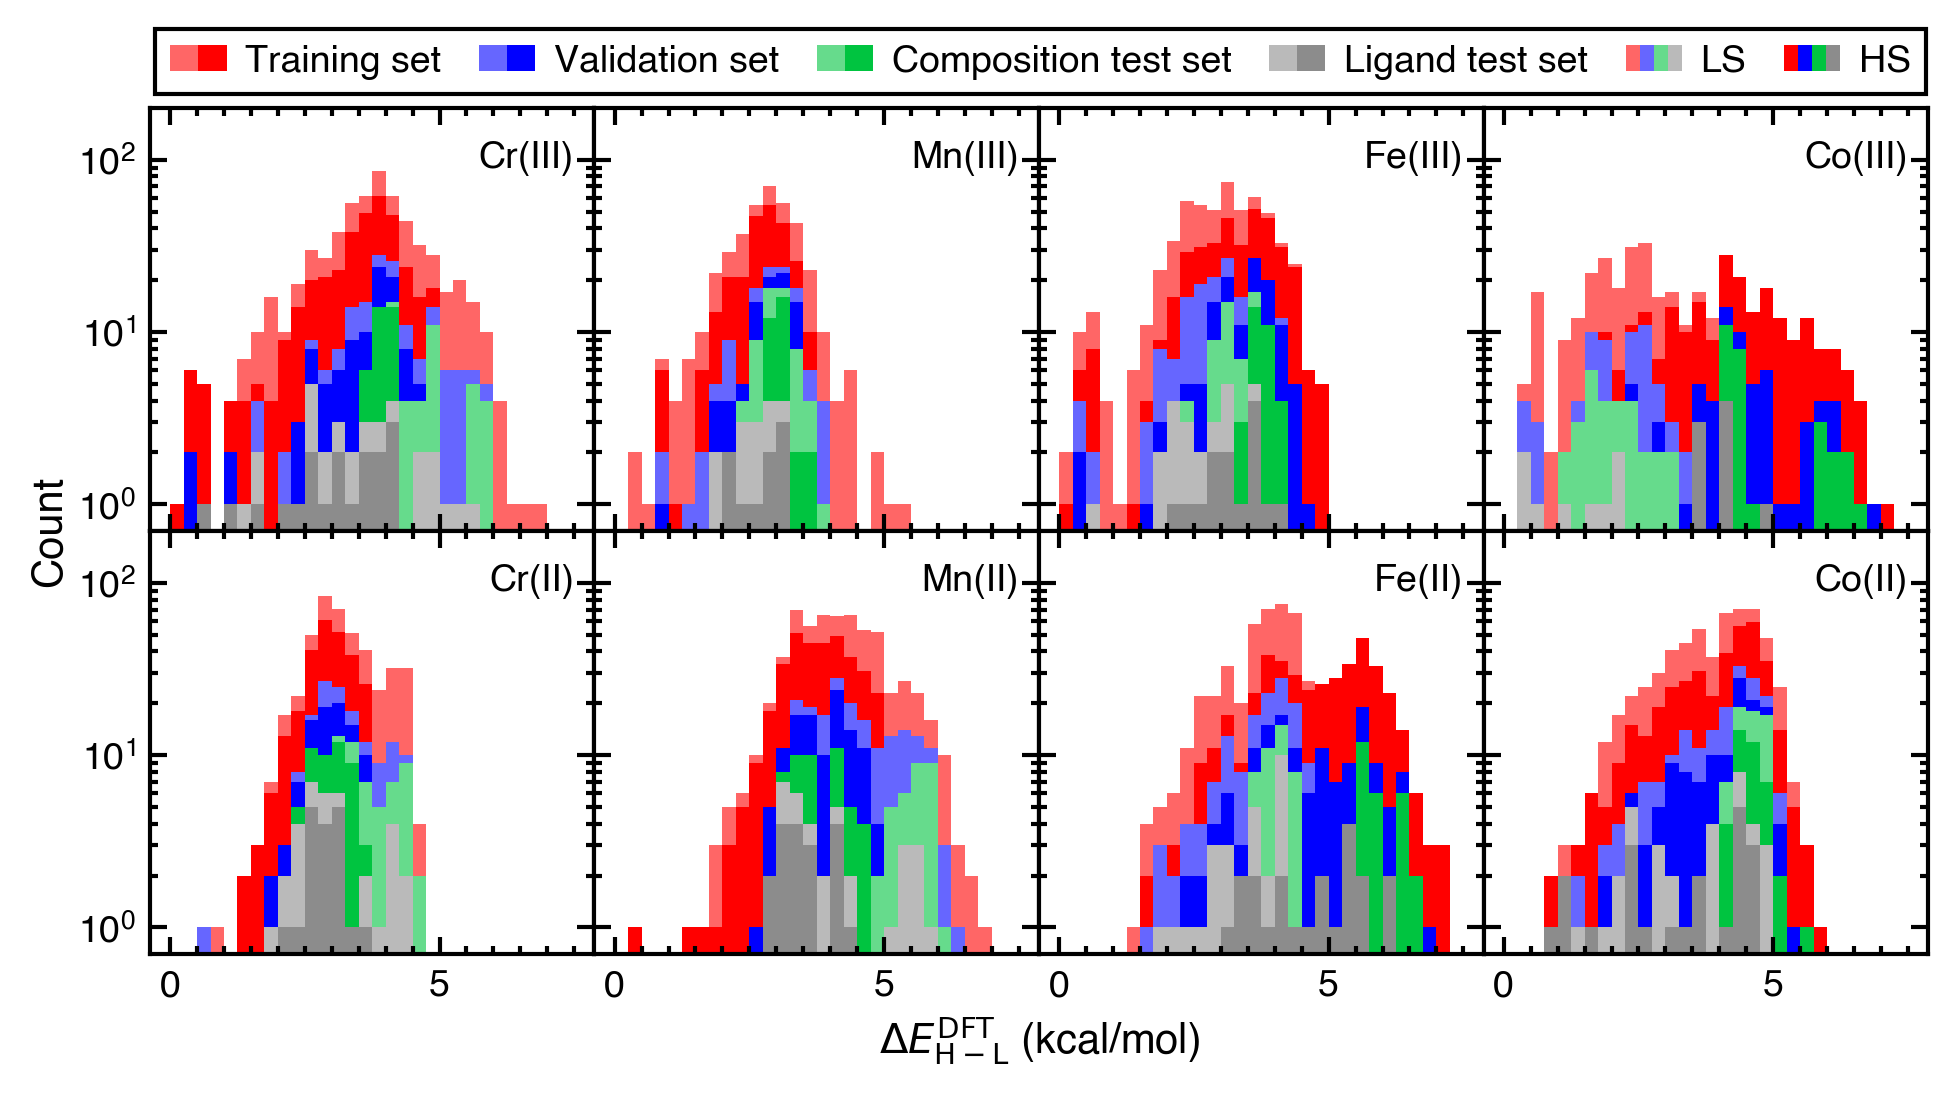

In [8]:
gridspec_kw = {
    "left": 0.08,
    "right": 0.97,
    "top": 0.90,
    "bottom": 0.13,
    "hspace": 0.0,
    "wspace": 0.0,
}
fig, axes = plt.subplots(
    figsize=(6.66, 1.1 * 3.33),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey=True,
    gridspec_kw=gridspec_kw,
)

bins = np.linspace(0.0, 7.5, 31)

for core, ax in zip(unique_cores, axes.T.flatten()):
    bottoms = np.zeros(len(bins) - 1)
    for i, df in enumerate(data_sets[::-1]):
        cores = df[["metal", "ox"]].apply(lambda x: f"{x.metal}{x.ox}", axis=1).values
        mask = cores == core
        y = (
            df[mask][TargetProperty.ORBITALS.full_name()].values[:, 2].flatten()
            - df[mask][TargetProperty.ORBITALS.full_name()].values[:, 0].flatten()
        )
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms, color=f"C{3-i}")
        bottoms += counts
        y = (
            df[mask][TargetProperty.ORBITALS.full_name()].values[:, 3].flatten()
            - df[mask][TargetProperty.ORBITALS.full_name()].values[:, 1].flatten()
        )
        counts, _, _ = ax.hist(y, bins=bins, bottom=bottoms, color=f"C{3-i}", alpha=0.6)
        bottoms += counts
    ax.text(
        7.5,
        130,
        f"{core[:2].capitalize()}({roman_numerals[core[-1]]})",
        ha="right",
        va="top",
        fontsize=9,
    )
    ax.set_yscale("log")
    ax.set_ylim(0.7, 200)
    ax.set_yticks(
        list(range(2, 10)) + [10 * i for i in range(2, 10)],
        minor=True,
    )
    ax.set_xticks(0.5 * np.arange(0, 16), minor=True)

# Labels
fig.text(
    gridspec_kw["left"] + 0.5 * (gridspec_kw["right"] - gridspec_kw["left"]),
    gridspec_kw["bottom"] - 0.09,
    "$\Delta E^\mathrm{DFT}_{\mathrm{H}-\mathrm{L}}$ (kcal/mol)",
    ha="center",
)
fig.text(
    0.02,
    gridspec_kw["bottom"] + 0.5 * (gridspec_kw["top"] - gridspec_kw["bottom"]),
    "Count",
    rotation=90,
    va="center",
)

dataset_legend(
    axes[0, 0], legend_kwargs=dict(bbox_to_anchor=(-0.03, 1.23), loc="upper left")
)
fig.savefig("plots/histogram_gap.pdf")